# End-to-end Machine Learning project

The best way to learning any programming language or new concept is to do hands-on on that. Let's start with buidling machine learning model

## Problem Statement

sui
sui

## Dataset

sui

It is located at `/home/sandeepgiri9034/BootML/Datasets/sui_1/`

# Get the data

In [4]:
import pandas as pd
import os

DATASET_PATH = '/home/sandeepgiri9034/BootML/Datasets/sui_1/'
def load_dataset_data(dataset_path=DATASET_PATH): 
    csv_path = os.path.join(dataset_path, "master.csv") 
    return pd.read_csv(csv_path)

In [5]:
sui = load_dataset_data()
sui.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


The relevant attributes in master.csv are : 

country, year, sex, age, population, suicides/100k pop, HDI for year, gdp_for_year ($), gdp_per_capita ($), generation, 



## Let's dop the irrelevant fields from our file


In [19]:
for x in ['suicides_no','country-year', ]:
    sui = sui.drop(x,axis=1)

In [20]:
sui.head()

,country,year,sex,age,population,suicides/100k pop,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,312900,6.71,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,308000,5.19,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,289700,4.83,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,21800,4.59,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,274300,3.28,NaN,"2,156,624,900",796,Boomers


## Know your data

In [21]:
# The info() method is useful to get a quick description of the data
# in particular the total number of rows,
# and each attribute’s type and number of non-null values

sui.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 10 columns):
country               27820 non-null object
year                  27820 non-null int64
sex                   27820 non-null object
age                   27820 non-null object
population            27820 non-null int64
suicides/100k pop     27820 non-null float64
HDI for year          8364 non-null float64
 gdp_for_year ($)     27820 non-null object
gdp_per_capita ($)    27820 non-null int64
generation            27820 non-null object
dtypes: float64(2), int64(3), object(5)
memory usage: 2.1+ MB


In [22]:
# Find out what categories exist for the categorical fields by using the value_counts() method
# And let's drop the rows which has missing categoical value

for x in ['country','sex','age','generation', ]:
    sui.dropna(subset=[x], how='all', inplace = True)
    print (x)
    print (sui[x].value_counts())

country
Austria                   382
Iceland                   382
Mauritius                 382
Netherlands               382
Israel                    372
Colombia                  372
Belgium                   372
Ecuador                   372
Spain                     372
Republic of Korea         372
Brazil                    372
Chile                     372
Puerto Rico               372
Greece                    372
Argentina                 372
Luxembourg                372
Malta                     372
Italy                     372
Japan                     372
Singapore                 372
United States             372
United Kingdom            372
Mexico                    372
Ireland                   360
Guatemala                 360
Norway                    360
Bulgaria                  360
Australia                 360
France                    360
Costa Rica                360
                         ... 
Estonia                   252
Latvia                    252
Be

In [23]:
sui.head()

,country,year,sex,age,population,suicides/100k pop,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,312900,6.71,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,308000,5.19,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,289700,4.83,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,21800,4.59,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,274300,3.28,NaN,"2,156,624,900",796,Boomers


In [24]:
# Let's look at the numerical fields.
# The describe() method shows a summary of the numerical attributes

sui.describe()

,year,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,4.380521e+07,224.970000,0.944000,126352.000000


The count, mean, min and max rows are self-explanatory.

**std** rows shows the standard deviation (which measures how dispersed the values are)

** 25%, 50%, 75% ** shows the corresponding percentiles

** Points to Note**

1. ** 25th percentile is called 1st quartile ** 
2. ** 50th percentile is called median ** 
3. ** 75th percentile is called 3rd quartile ** 

## Plot histogram

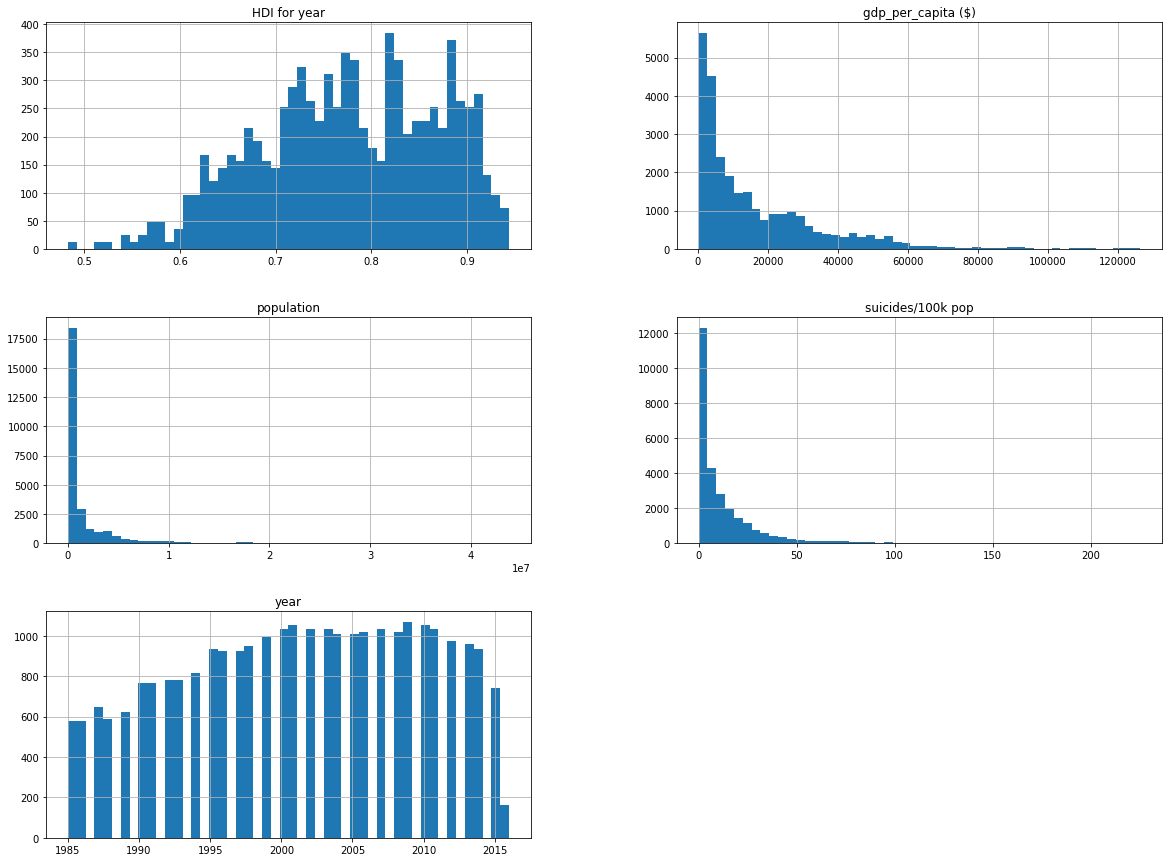

In [25]:
# Let's plot a histogram to get the feel of type of data we are dealing with
# We can plot histogram only for numerical attributres

%matplotlib inline
import matplotlib.pyplot as plt
sui.hist(bins=50, figsize=(20,15))
plt.show()

## Split dataset into test and training set

In [26]:
# To make this notebook's output identical at every run

import numpy as np

np.random.seed(42)

In [27]:
# With sklearn train_test_split

from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(sui, test_size=0.2, random_state=42)

print ("Length of train set is", len(train_set))
print ("Length of test set is", len(test_set))


Length of train set is 22256
Length of test set is 5564


In [83]:
sui = train_set.copy()
sui.head()

,country,year,sex,age,population,suicides/100k pop,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
668,Argentina,1991,female,25-34 years,2310000,3.33,NaN,"189,719,984,268",6404,Boomers
18772,Paraguay,2005,male,35-54 years,575210,6.95,0.646,"8,734,653,809",1704,Boomers
8703,Fiji,2009,male,35-54 years,105083,7.61,NaN,"2,870,624,636",3765,Boomers
16909,Mexico,2013,female,75+ years,1815829,0.88,0.755,"1,274,443,078,609",11478,Silent
20924,Romania,2015,male,5-14 years,1088177,1.01,NaN,"177,911,101,680",9431,Generation Z


# Discover and visualize the data to gain insights

In [84]:
sui

,country,year,sex,age,population,suicides/100k pop,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
668,Argentina,1991,female,25-34 years,2310000,3.33,NaN,"189,719,984,268",6404,Boomers
18772,Paraguay,2005,male,35-54 years,575210,6.95,0.646,"8,734,653,809",1704,Boomers
8703,Fiji,2009,male,35-54 years,105083,7.61,NaN,"2,870,624,636",3765,Boomers
16909,Mexico,2013,female,75+ years,1815829,0.88,0.755,"1,274,443,078,609",11478,Silent
20924,Romania,2015,male,5-14 years,1088177,1.01,NaN,"177,911,101,680",9431,Generation Z
7585,Denmark,2007,female,5-14 years,334828,0.00,NaN,"319,423,370,134",62229,Generation Z
812,Argentina,2003,female,35-54 years,4402438,4.45,NaN,"127,586,973,492",3668,Boomers
25124,Thailand,2000,male,35-54 years,8517696,14.83,0.648,"126,392,308,498",2169,Boomers
16124,Malta,2011,male,15-24 years,28714,10.45,0.822,"9,507,645,260",23984,Millenials
14833,Latvia,1998,female,75+ years,91900,26.12,NaN,"7,174,985,107",3061,G.I. Generation


In [87]:
df = sui[["year", "suicides/100k pop"]]

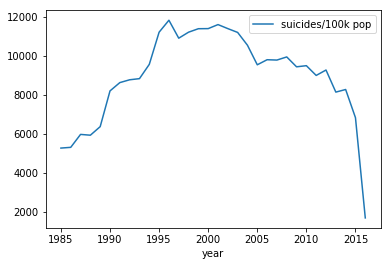

In [90]:
df.groupby("year").sum().plot()

In [7]:
original_df = load_dataset_data()

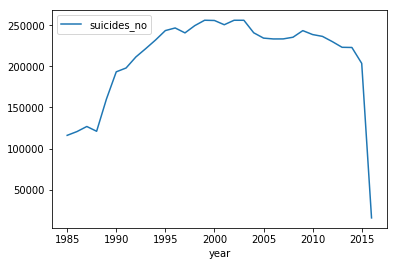

In [98]:
original_df[["year", "suicides_no"]].groupby("year").sum().plot()

In [99]:
original_df[["sex", "suicides_no"]].groupby("sex").sum()

,suicides_no
sex,
female,1559510
male,5188910


In [17]:
males_age_grp = original_df[["age","sex", "suicides_no"]].groupby(["age", "sex"]).sum()

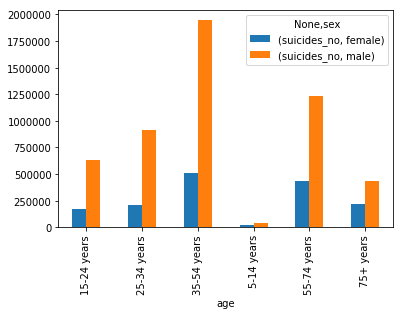

In [48]:
males_age_grp.unstack("sex").plot(kind="bar")

# Generate correlations

In [30]:
corr_matrix = sui.corr()
corr_matrix

,year,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
year,1.000000,0.008853,-0.041237,0.370221,0.340105
population,0.008853,1.000000,0.006271,0.095419,0.080938
suicides/100k pop,-0.041237,0.006271,1.000000,0.068971,-0.001522
HDI for year,0.370221,0.095419,0.068971,1.000000,0.768406
gdp_per_capita ($),0.340105,0.080938,-0.001522,0.768406,1.000000


In [31]:
for x in ['suicides/100k pop', ]:
    print (corr_matrix[x])

year                 -0.041237
population            0.006271
suicides/100k pop     1.000000
HDI for year          0.068971
gdp_per_capita ($)   -0.001522
Name: suicides/100k pop, dtype: float64


In [32]:
for x in ['suicides/100k pop', ]:
    print (corr_matrix[x].sort_values(ascending=False))

suicides/100k pop     1.000000
HDI for year          0.068971
population            0.006271
gdp_per_capita ($)   -0.001522
year                 -0.041237
Name: suicides/100k pop, dtype: float64


# Generate scatter matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7faf5aaa80f0>,
      dtype=object)

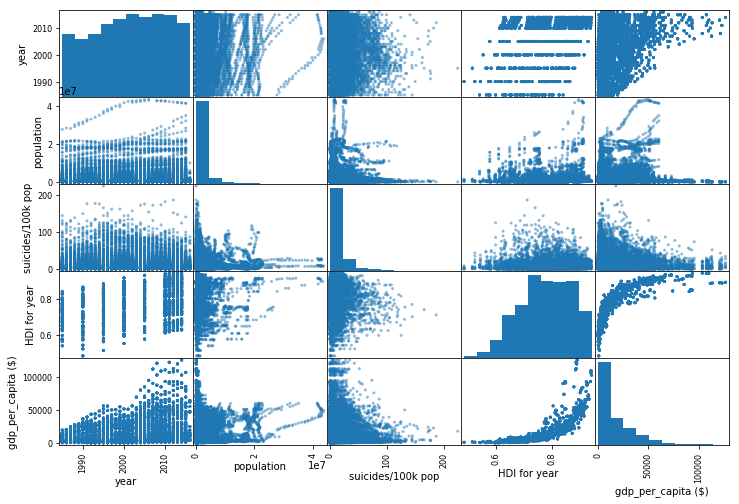

In [33]:
# from pandas.tools.plotting import scatter_matrix # For older versions of Pandas
# Decrease the number of numerical attributes in the for loop below to get a clear picture in the matrices

from pandas.plotting import scatter_matrix

x = 0
attributes = []
for x in ['year','population','suicides/100k pop','HDI for year','gdp_per_capita ($)', ]:
    attributes.append(x)
scatter_matrix(sui[attributes], figsize=(12, 8))

In [ ]:
sui.describe()

# Prepare the data for Machine Learning algorithms

In [34]:
# Let’s revert to a clean training set

x = 0
for x in ['suicides/100k pop', ]:
    sui = train_set.drop(x, axis=1) # drop label for training set
    sui_labels = train_set[x].copy()

# Note drop() creates a copy of the data and does not affect train_set

In [35]:
# Let’s experiment with sample dataset for data cleaning

sample_incomplete_rows = sui[sui.isnull().any(axis=1)].head()
sample_incomplete_rows

,country,year,sex,age,population,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
668,Argentina,1991,female,25-34 years,2310000,NaN,"189,719,984,268",6404,Boomers
8703,Fiji,2009,male,35-54 years,105083,NaN,"2,870,624,636",3765,Boomers
20924,Romania,2015,male,5-14 years,1088177,NaN,"177,911,101,680",9431,Generation Z
7585,Denmark,2007,female,5-14 years,334828,NaN,"319,423,370,134",62229,Generation Z
812,Argentina,2003,female,35-54 years,4402438,NaN,"127,586,973,492",3668,Boomers


In [36]:
# Let's use Scikit-Learn Imputer class to fill missing values

from sklearn.preprocessing import Imputer
imputer = Imputer(strategy="mean")

In [37]:
from sklearn.base import BaseEstimator, TransformerMixin

# Create a class to select numerical or categorical columns 
# since Scikit-Learn doesn't handle DataFrames yet
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [38]:
# Remove the text attributes because Imputer works on numerical attributes

sui_num = sui
for x in ['country','sex','age','generation', ]:
    sui_num = sui_num.drop(x, axis=1)

Now let's preprocess the categorical fields

In [39]:
# Convert categorical fields to numbers
cat_variables = []
for x in ['country','sex','age','generation', ]:
    cat_variables.append(x)
sui_cat = sui[cat_variables]

In [40]:
sui_cat.head(10)

,country,sex,age,generation
668,Argentina,female,25-34 years,Boomers
18772,Paraguay,male,35-54 years,Boomers
8703,Fiji,male,35-54 years,Boomers
16909,Mexico,female,75+ years,Silent
20924,Romania,male,5-14 years,Generation Z
7585,Denmark,female,5-14 years,Generation Z
812,Argentina,female,35-54 years,Boomers
25124,Thailand,male,35-54 years,Boomers
16124,Malta,male,15-24 years,Millenials
14833,Latvia,female,75+ years,G.I. Generation


In [41]:
# Definition of the CategoricalEncoder class

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils import check_array
from sklearn.preprocessing import LabelEncoder
from scipy import sparse

class CategoricalEncoder(BaseEstimator, TransformerMixin):
    """Encode categorical features as a numeric array.
    The input to this transformer should be a matrix of integers or strings,
    denoting the values taken on by categorical (discrete) features.
    The features can be encoded using a one-hot aka one-of-K scheme
    (``encoding='onehot'``, the default) or converted to ordinal integers
    (``encoding='ordinal'``).
    This encoding is needed for feeding categorical data to many scikit-learn
    estimators, notably linear models and SVMs with the standard kernels.
    Read more in the :ref:`User Guide <preprocessing_categorical_features>`.
    Parameters
    ----------
    encoding : str, 'onehot', 'onehot-dense' or 'ordinal'
        The type of encoding to use (default is 'onehot'):
        - 'onehot': encode the features using a one-hot aka one-of-K scheme
          (or also called 'dummy' encoding). This creates a binary column for
          each category and returns a sparse matrix.
        - 'onehot-dense': the same as 'onehot' but returns a dense array
          instead of a sparse matrix.
        - 'ordinal': encode the features as ordinal integers. This results in
          a single column of integers (0 to n_categories - 1) per feature.
    categories : 'auto' or a list of lists/arrays of values.
        Categories (unique values) per feature:
        - 'auto' : Determine categories automatically from the training data.
        - list : ``categories[i]`` holds the categories expected in the ith
          column. The passed categories are sorted before encoding the data
          (used categories can be found in the ``categories_`` attribute).
    dtype : number type, default np.float64
        Desired dtype of output.
    handle_unknown : 'error' (default) or 'ignore'
        Whether to raise an error or ignore if a unknown categorical feature is
        present during transform (default is to raise). When this is parameter
        is set to 'ignore' and an unknown category is encountered during
        transform, the resulting one-hot encoded columns for this feature
        will be all zeros.
        Ignoring unknown categories is not supported for
        ``encoding='ordinal'``.
    Attributes
    ----------
    categories_ : list of arrays
        The categories of each feature determined during fitting. When
        categories were specified manually, this holds the sorted categories
        (in order corresponding with output of `transform`).
    Examples
    --------
    Given a dataset with three features and two samples, we let the encoder
    find the maximum value per feature and transform the data to a binary
    one-hot encoding.
    >>> from sklearn.preprocessing import CategoricalEncoder
    >>> enc = CategoricalEncoder(handle_unknown='ignore')
    >>> enc.fit([[0, 0, 3], [1, 1, 0], [0, 2, 1], [1, 0, 2]])
    ... # doctest: +ELLIPSIS
    CategoricalEncoder(categories='auto', dtype=<... 'numpy.float64'>,
              encoding='onehot', handle_unknown='ignore')
    >>> enc.transform([[0, 1, 1], [1, 0, 4]]).toarray()
    array([[ 1.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.],
           [ 0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.]])
    See also
    --------
    sklearn.preprocessing.OneHotEncoder : performs a one-hot encoding of
      integer ordinal features. The ``OneHotEncoder assumes`` that input
      features take on values in the range ``[0, max(feature)]`` instead of
      using the unique values.
    sklearn.feature_extraction.DictVectorizer : performs a one-hot encoding of
      dictionary items (also handles string-valued features).
    sklearn.feature_extraction.FeatureHasher : performs an approximate one-hot
      encoding of dictionary items or strings.
    """

    def __init__(self, encoding='onehot', categories='auto', dtype=np.float64,
                 handle_unknown='error'):
        self.encoding = encoding
        self.categories = categories
        self.dtype = dtype
        self.handle_unknown = handle_unknown

    def fit(self, X, y=None):
        """Fit the CategoricalEncoder to X.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_feature]
            The data to determine the categories of each feature.
        Returns
        -------
        self
        """

        if self.encoding not in ['onehot', 'onehot-dense', 'ordinal']:
            template = ("encoding should be either 'onehot', 'onehot-dense' "
                        "or 'ordinal', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.handle_unknown not in ['error', 'ignore']:
            template = ("handle_unknown should be either 'error' or "
                        "'ignore', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.encoding == 'ordinal' and self.handle_unknown == 'ignore':
            raise ValueError("handle_unknown='ignore' is not supported for"
                             " encoding='ordinal'")

        X = check_array(X, dtype=np.object, accept_sparse='csc', copy=True)
        n_samples, n_features = X.shape

        self._label_encoders_ = [LabelEncoder() for _ in range(n_features)]

        for i in range(n_features):
            le = self._label_encoders_[i]
            Xi = X[:, i]
            if self.categories == 'auto':
                le.fit(Xi)
            else:
                valid_mask = np.in1d(Xi, self.categories[i])
                if not np.all(valid_mask):
                    if self.handle_unknown == 'error':
                        diff = np.unique(Xi[~valid_mask])
                        msg = ("Found unknown categories {0} in column {1}"
                               " during fit".format(diff, i))
                        raise ValueError(msg)
                le.classes_ = np.array(np.sort(self.categories[i]))

        self.categories_ = [le.classes_ for le in self._label_encoders_]

        return self

    def transform(self, X):
        """Transform X using one-hot encoding.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_features]
            The data to encode.
        Returns
        -------
        X_out : sparse matrix or a 2-d array
            Transformed input.
        """
        X = check_array(X, accept_sparse='csc', dtype=np.object, copy=True)
        n_samples, n_features = X.shape
        X_int = np.zeros_like(X, dtype=np.int)
        X_mask = np.ones_like(X, dtype=np.bool)

        for i in range(n_features):
            valid_mask = np.in1d(X[:, i], self.categories_[i])

            if not np.all(valid_mask):
                if self.handle_unknown == 'error':
                    diff = np.unique(X[~valid_mask, i])
                    msg = ("Found unknown categories {0} in column {1}"
                           " during transform".format(diff, i))
                    raise ValueError(msg)
                else:
                    # Set the problematic rows to an acceptable value and
                    # continue `The rows are marked `X_mask` and will be
                    # removed later.
                    X_mask[:, i] = valid_mask
                    X[:, i][~valid_mask] = self.categories_[i][0]
            X_int[:, i] = self._label_encoders_[i].transform(X[:, i])

        if self.encoding == 'ordinal':
            return X_int.astype(self.dtype, copy=False)

        mask = X_mask.ravel()
        n_values = [cats.shape[0] for cats in self.categories_]
        n_values = np.array([0] + n_values)
        indices = np.cumsum(n_values)

        column_indices = (X_int + indices[:-1]).ravel()[mask]
        row_indices = np.repeat(np.arange(n_samples, dtype=np.int32),
                                n_features)[mask]
        data = np.ones(n_samples * n_features)[mask]

        out = sparse.csc_matrix((data, (row_indices, column_indices)),
                                shape=(n_samples, indices[-1]),
                                dtype=self.dtype).tocsr()
        if self.encoding == 'onehot-dense':
            return out.toarray()
        else:
            return out

In [42]:
from sklearn.pipeline import Pipeline
cat_attribs = list(sui_cat)
cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(cat_attribs)),
    ('cat_encoder', CategoricalEncoder(encoding="onehot-dense")),
])


## Feature scaling

In [43]:
# Use Scikit-Learn minmax_scaling

from mlxtend.preprocessing import minmax_scaling
num_variables_min_max = []
for x in ['year','population','HDI for year','gdp_per_capita ($)', ]:
    num_variables_min_max.append(x)
sui_num_min_max = sui_num[num_variables_min_max]
sui_num_min_max.head()

,year,population,HDI for year,gdp_per_capita ($)
668,1991,2310000,NaN,6404
18772,2005,575210,0.646,1704
8703,2009,105083,NaN,3765
16909,2013,1815829,0.755,11478
20924,2015,1088177,NaN,9431


In [44]:
# Building a pipeline for preprocessing the numerical attributes for MinMaxScaler:

from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
num_attribs_min_max = list(sui_num_min_max)
num_pipeline_min_max = Pipeline([
    ('selector', DataFrameSelector(num_attribs_min_max)),
    ('imputer', Imputer(strategy="mean")),
    ('min_max_scaler', MinMaxScaler()),
])


In [45]:
from sklearn.pipeline import FeatureUnion
full_pipeline = FeatureUnion(transformer_list=[
    ("num_pipeline_min_max", num_pipeline_min_max),
    ("cat_pipeline", cat_pipeline),
])


In [46]:
sui.head()

,country,year,sex,age,population,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
668,Argentina,1991,female,25-34 years,2310000,NaN,"189,719,984,268",6404,Boomers
18772,Paraguay,2005,male,35-54 years,575210,0.646,"8,734,653,809",1704,Boomers
8703,Fiji,2009,male,35-54 years,105083,NaN,"2,870,624,636",3765,Boomers
16909,Mexico,2013,female,75+ years,1815829,0.755,"1,274,443,078,609",11478,Silent
20924,Romania,2015,male,5-14 years,1088177,NaN,"177,911,101,680",9431,Generation Z


In [47]:
sui_prepared = full_pipeline.fit_transform(sui)
print(sui_prepared[0])
print(sui_prepared[1])
print(sui_prepared[2])

[0.19354839 0.05272744 0.63746708 0.04879422 0.         0.
 1.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [48]:
sui_prepared.shape

(22256, 119)

# Select and train a model 

In [49]:
# Function to display scores of our alogorithms for cross-validation

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())


In [50]:
# Train a Linear Regression model

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(sui_prepared, sui_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [51]:
# Calculate the RMSE in Linear Regression Model

from sklearn.metrics import mean_squared_error

sui_predictions = lin_reg.predict(sui_prepared)
lin_mse = mean_squared_error(sui_labels, sui_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

13.15056720388776

In [52]:
# K-fold Cross Validation for Linear Regression
from sklearn.model_selection import cross_val_score

lin_scores = cross_val_score(lin_reg, sui_prepared, sui_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [13.07678    13.92665211 12.61470274 12.68474741 13.69453848 12.77738616
 13.67168708 13.09385515 13.1532166  13.41401945]
Mean: 13.210758517565925
Standard deviation: 0.4307001654665673


In [53]:
# Train a model using Decision Tree

from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(sui_prepared, sui_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

In [54]:
# Calculate RMSE in Decision Tree model
from sklearn.metrics import mean_squared_error

sui_predictions = tree_reg.predict(sui_prepared)
tree_mse = mean_squared_error(sui_labels, sui_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

7.20563587008469e-19

In [55]:
# K-fold Cross Validation for Decision Tree Model
from sklearn.model_selection import cross_val_score

tree_reg = DecisionTreeRegressor(random_state=42)
scores = cross_val_score(tree_reg, sui_prepared, sui_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [56]:
display_scores(tree_rmse_scores)

Scores: [7.60783972 8.80286003 6.95106552 7.5873428  7.29148463 9.12313566
 7.97865835 6.38481497 7.320638   8.67922851]
Mean: 7.772706819469393
Standard deviation: 0.827519880293182


In [57]:
# Train a model using Random Forests

from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(sui_prepared, sui_labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [58]:
# Calculate RMSE in Random Forest model
from sklearn.metrics import mean_squared_error

sui_predictions = forest_reg.predict(sui_prepared)
forest_mse = mean_squared_error(sui_labels, sui_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

2.681887462643488

In [59]:
# Cross Validation in Random Forest model

from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, sui_prepared, sui_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [6.1590043  8.0288281  5.64441418 6.2857406  5.81692986 6.75721499
 6.30893109 5.83912467 5.51955798 6.3089259 ]
Mean: 6.266867167361393
Standard deviation: 0.6849673125794994


In [60]:
# Total attributes

attributes = num_attribs_min_max + cat_attribs

## Fine-tune the Model

In [61]:
# GridSearchCV

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]

algo = RandomForestRegressor(random_state=42)
# train across 10 folds
grid_search = GridSearchCV(algo, param_grid, cv=10,
                           scoring='neg_mean_squared_error')
grid_search.fit(sui_prepared, sui_labels)

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [62]:
# The best hyperparameter combinations

grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [63]:
# Get the best estimator

grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=8, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=30, n_jobs=1, oob_score=False, random_state=42,
           verbose=0, warm_start=False)

In [64]:
# Let's look at the score of each hyperparameter combination tested during the grid search

cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

8.348705083969595 {'max_features': 2, 'n_estimators': 3}
7.172450376399553 {'max_features': 2, 'n_estimators': 10}
6.794776759332279 {'max_features': 2, 'n_estimators': 30}
8.195698613805423 {'max_features': 4, 'n_estimators': 3}
7.116267726118328 {'max_features': 4, 'n_estimators': 10}
6.746477662538066 {'max_features': 4, 'n_estimators': 30}
8.05976627212668 {'max_features': 6, 'n_estimators': 3}
7.02140559419852 {'max_features': 6, 'n_estimators': 10}
6.645187542713801 {'max_features': 6, 'n_estimators': 30}
7.935561890117292 {'max_features': 8, 'n_estimators': 3}
6.946975228532538 {'max_features': 8, 'n_estimators': 10}
6.564494828807978 {'max_features': 8, 'n_estimators': 30}
8.172292308184588 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
7.251313870570197 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
7.995354400629947 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
7.070594054539419 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}


### Analyze the Best Models and Their Errors

In [65]:
# See the importance score of each attribute in GridSearchCV

feature_importances = grid_search.best_estimator_.feature_importances_
sorted(zip(feature_importances, attributes), reverse=True)

[(0.10278016554942958, 'population'),
 (0.06357228522595261, 'gdp_per_capita ($)'),
 (0.04168126732825557, 'year'),
 (0.020283857378434293, 'HDI for year'),
 (0.002710457458297534, 'sex'),
 (0.0023373958048625346, 'country'),
 (0.0021966044492288685, 'generation'),
 (0.0009208031609108361, 'age')]

In [66]:
# Evaluate model on the Test Set

final_model = grid_search.best_estimator_

x = 0
for x in ['suicides/100k pop', ]:
    X_test = test_set.drop(x, axis=1)
    y_test = test_set[x].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [67]:
final_rmse

6.405854627681095

Congratulations! You already know quite a lot about Machine Learning. :)

# Conclusion
    + The BootML is super useful :)
    + The males commit 3 times suicides as compared to females (globally)
    + The maximum rate of suicides is between age groups: 35-54
    + The suicide rates per 100k pop go up with population and gdp (which looks odd)
    + The suicides rate suddenly went up from 1985 to 2000. Is it due to the internet? Or is it because the data collection became more prominient